In [1]:
from color_in_circle_functions import *
import matplotlib
import math 
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
%matplotlib widget

In [3]:
#Utils

#Computes the distance to the center (which is at (0., 0.))
def dist_center(x, y):
    dist = math.sqrt((x-0.)**2 + (y-0.)**2)
    #print(dist)
    return dist

#Computes the distance to the center (which is at (-2., 0.))
def dist_center_2(x, y):
    dist = math.sqrt((x+2.)**2 + (y-0.)**2)
    #print(dist)
    return dist

#Computes if shop is in circle
def in_circle(a):
    x = a[0]
    y = a[1]
    if dist_center(x, y) < 1:
        return True
    else:
        return False
    
#Computes if shop is in circle 2
def in_circle_2(a):
    x = a[0]
    y = a[1]
    if dist_center_2(x, y) < 0.5:
        return True
    else:
        return False

#Computes the location at which the opponent will move their store
def update_opponent(x,y,factor):
    d_c = dist_center(x,y)
    x_rel = x-0.5
    y_rel = y-0.5
    
    sgn = -1 if x_rel > 0 else 1
    
    alpha = math.atan(y_rel/x_rel)
    upd_x = x_rel+math.cos(alpha)*sgn*factor
    upd_y = y_rel+math.sin(alpha)*sgn*factor
    return upd_x+0.5, upd_y+0.5

#Computes the coordinates of the polygon that represents store's customers
def compute_polygon_coordinates(point1, point2):
    coord = []
    point1_x = point1[0]
    point1_y = point1[1]
    point2_x = point2[0]
    point2_y = point2[1]
    angle_point1 = cmath.polar(complex(point1_x, point1_y))[1]
    angle_point2 = cmath.polar(complex(point2_x, point2_y))[1]
    #print(angle_point1)
    #print(angle_point2)
    theta = angle_point2-angle_point1
    #print(theta)
    if theta > np.pi:
        theta = -(2*np.pi-theta)
    if theta < -np.pi:
        theta = -(-2*np.pi-theta)
    #print(theta)
    for delta in np.arange(0, theta, sign_function(theta)*0.001):
        new_angle = angle_point1+delta
        coord.append([1*np.cos(new_angle), 1*np.sin(new_angle)])
    return coord, theta

def compute_polygon_coordinates_large(point1, point2):
    coord = []
    point1_x = point1[0]
    point1_y = point1[1]
    point2_x = point2[0]
    point2_y = point2[1]
    angle_point1 = cmath.polar(complex(point1_x, point1_y))[1]
    angle_point2 = cmath.polar(complex(point2_x, point2_y))[1]
    #print(angle_point1)
    #print(angle_point2)
    theta = angle_point2-angle_point1
    #print(theta)
    if theta > np.pi:
        theta = -(2*np.pi-theta)
    if theta < -np.pi:
        theta = -(-2*np.pi-theta)
    #print(theta)
    if theta >= 0:
        for delta in np.arange(0, -1*(2*np.pi-theta), -1*sign_function(theta)*0.001):
            new_angle = angle_point1+delta
            coord.append([1*np.cos(new_angle), 1*np.sin(new_angle)])
        return coord, (2*np.pi-theta)
    if theta < 0:
        for delta in np.arange(0, (2*np.pi+theta), -1*sign_function(theta)*0.001):
            new_angle = angle_point1+delta
            coord.append([1*np.cos(new_angle), 1*np.sin(new_angle)])
        return coord, (2*np.pi+theta)

#Computes the coordinates of the polygon that represents store's customers
def compute_polygon_coordinates_2(point1, point2):
    coord = []
    point1_x = point1[0]
    point1_y = point1[1]
    point2_x = point2[0]
    point2_y = point2[1]
    angle_point1 = cmath.polar(complex(point1_x, point1_y))[1]
    angle_point2 = cmath.polar(complex(point2_x, point2_y))[1]
    #print(angle_point1)
    #print(angle_point2)
    theta = angle_point2-angle_point1
    #print(theta)
    if theta > np.pi:
        theta = -(2*np.pi-theta)
    if theta < -np.pi:
        theta = -(-2*np.pi-theta)
    #print(theta)
    for delta in np.arange(0, theta, sign_function(theta)*0.001):
        new_angle = angle_point1+delta
        coord.append([(0.5*np.cos(new_angle)) -2., 0.5*np.sin(new_angle)])
    return coord, theta

def compute_polygon_coordinates_large_2(point1, point2):
    coord = []
    point1_x = point1[0]
    point1_y = point1[1]
    point2_x = point2[0]
    point2_y = point2[1]
    angle_point1 = cmath.polar(complex(point1_x, point1_y))[1]
    angle_point2 = cmath.polar(complex(point2_x, point2_y))[1]
    #print(angle_point1)
    #print(angle_point2)
    theta = angle_point2-angle_point1
    #print(theta)
    if theta > np.pi:
        theta = -(2*np.pi-theta)
    if theta < -np.pi:
        theta = -(-2*np.pi-theta)
    #print(theta)
    if theta >= 0:
        for delta in np.arange(0, -1*(2*np.pi-theta), -1*sign_function(theta)*0.001):
            new_angle = angle_point1+delta
            coord.append([(0.5*np.cos(new_angle))-2, 0.5*np.sin(new_angle)])
        return coord, (2*np.pi-theta)
    if theta < 0:
        for delta in np.arange(0, (2*np.pi+theta), -1*sign_function(theta)*0.001):
            new_angle = angle_point1+delta
            coord.append([(0.5*np.cos(new_angle))-2, 0.5*np.sin(new_angle)])
        return coord, (2*np.pi+theta)

#return location shop1
def get_shop1_location():
    return (shop1_location[0].get_data()[0][0], shop1_location[0].get_data()[1][0])

#return location shop2
def get_shop2_location():
    return (shop2_location[0].get_data()[0][0], shop2_location[0].get_data()[1][0])

#Changes the store which is currently being modified by the user
def change_store(self):
    change_store.counter += 1
    change_store.counter = change_store.counter%2
    print(change_store.counter)
    
change_store.counter = 0

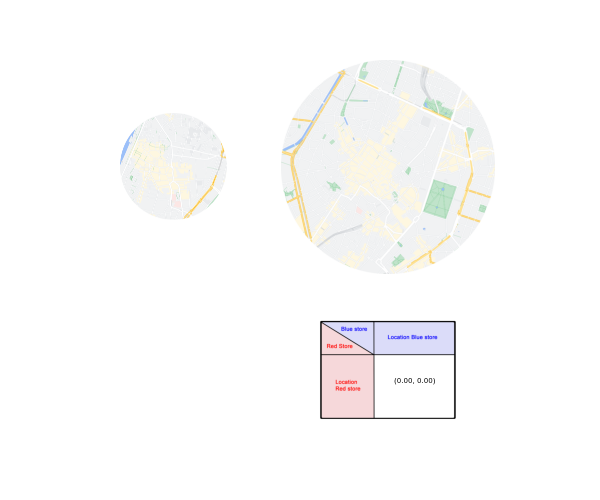

Button(button_style='danger', description='Change Store', icon='check', style=ButtonStyle(), tooltip='Click me…

In [4]:
plt.ioff();
#fig = plt.figure(num='Nash City', figsize=(14,7))
#fig = plt.figure(num='Store Locations', figsize=(14,7))
#fig = plt.figure(num='Store Locations', figsize=(8,4))
fig = plt.figure(num='Store Locations', figsize=(6,5))
ax = fig.gca()

#background
image = plt.imread('brussels.png')
im = ax.imshow(image, extent = [-1,1,-1,1])
image2 = plt.imread('table.png')
image3 = plt.imread('antwerp3.png')
#im2 = ax.imshow(image2, extent = [1.5,2.5,-0.5,0.5])
im2 = ax.imshow(image2, extent = [-0.7,0.7,-2.6,-1.2])
im3 = ax.imshow(image3, extent = [-2.5,-1.5,-0.5,0.5])
#icons
#image3 = plt.imread('red.png')
#image_box = OffsetImage(image3, zoom=0.1)

plt.axis('off')
#circle = matplotlib.patches.Circle((0.5, 0.5), radius=0.5, fc=(0,0,1,0.2) ,edgecolor="black", linewidth=0)
circle = matplotlib.patches.Circle((0., 0.), radius=1, fc=(0,0,0,0) ,edgecolor="black", linewidth=0)
circle_2 = matplotlib.patches.Circle((-2., 0.), radius=0.5, fc=(0,0,0,0) ,edgecolor="black", linewidth=0)
ax.add_patch(circle)
ax.add_patch(circle_2)
#plt.plot(0., 0., 'X', color='black')

#define polygon
polygon = matplotlib.patches.Polygon(np.array([[0, 0], [0, 0]]), closed=True, color="red", linewidth=0)
polygon_large = matplotlib.patches.Polygon(np.array([[0, 0], [0, 0]]), closed=True, color="red", linewidth=0)
ax.add_patch(polygon)
ax.add_patch(polygon_large)
polygon_2 = matplotlib.patches.Polygon(np.array([[0, 0], [0, 0]]), closed=True, color="red", linewidth=0)
polygon_large_2 = matplotlib.patches.Polygon(np.array([[0, 0], [0, 0]]), closed=True, color="red", linewidth=0)
ax.add_patch(polygon_2)
ax.add_patch(polygon_large_2)

#add text
t = ax.text(
    0.25, -2, "(0.00, 0.00)", ha="center", va="center", rotation=0, size=5.,
    bbox=dict(boxstyle="round, pad=0.3", fc="white", ec="w", lw=2))
bb = t.get_bbox_patch()
ax.add_patch(bb)

#shop1 is red store, shop2 is blue store
shop1_location = plt.plot(1., 1., 'X', color='black',alpha=0.)
#shop1_location = AnnotationBbox(image_box, (1., 1.), frameon=False)
shop2_location = plt.plot(1., 1., 'X', color='black',alpha=0.)




def onclick(event):
    if(dist_center(event.xdata, event.ydata)<=1 or dist_center_2(event.xdata, event.ydata)<=0.5):
        if(change_store.counter == 1):
            shop1_location.pop(0).remove()
            shop1_location.append(plt.plot(event.xdata, event.ydata, '*', color='red', ms=10)[0])
        elif(change_store.counter == 0):
            shop2_location.pop(0).remove()
            shop2_location.append(plt.plot(event.xdata, event.ydata, '*', color='blue', ms=10)[0])
    shop1_coord = get_shop1_location()
    shop2_coord = get_shop2_location()
    payout_red = 0.
    payout_blue = 0.
    if in_circle(shop1_coord) and in_circle(shop2_coord):
        #compute division line 
        intersection_point = ((shop1_coord[0]+shop2_coord[0])/2, (shop1_coord[1]+shop2_coord[1])/2)
        (x_m, y_m) = intersection_point
        (y_d, x_d) = (shop2_coord[0]-shop1_coord[0], -(shop2_coord[1]-shop1_coord[1]))
        #division line is (x_m+delta*x_d, y_m+delta*y_d)
        a = x_d**2 + y_d**2
        b = 2*x_m*x_d + 2*y_m*y_d
        c = x_m**2 + y_m**2 - 1
        deltas = np.roots(np.array([a, b, c]))
        #compute intersection points between division line and circle
        cirle_intersection_point_1 = (x_m+(deltas[0]*x_d), y_m+(deltas[0]*y_d))
        cirle_intersection_point_2 = (x_m+(deltas[1]*x_d), y_m+(deltas[1]*y_d))
        #update polygon
        if dist_center(shop1_coord[0],shop1_coord[1])>dist_center(shop2_coord[0],shop2_coord[1]):
            circle.set_fc((0,0,1,0.0))
            polygon.set_fc((1,0,0,0.2))
            coord, theta = compute_polygon_coordinates(cirle_intersection_point_1, cirle_intersection_point_2)
            polygon.set_xy(coord)
            polygon_large.set_fc((0,0,1,0.2))
            coord_large, theta_large = compute_polygon_coordinates_large(cirle_intersection_point_1, cirle_intersection_point_2)
            polygon_large.set_xy(coord_large)
            #display text
            big_area = (1/2 * (theta_large-math.sin(theta_large))) / np.pi
            #t.set_text("(" + str(1-big_area)[0:4] + " , " + str(big_area)[0:4] + ")")
            payout_blue += big_area * 300000
            payout_red += (1.-big_area) * 300000
        else:
            circle.set_fc((0,0,1,0.0))
            polygon.set_fc((0,0,1,0.2))
            coord, theta = compute_polygon_coordinates(cirle_intersection_point_1, cirle_intersection_point_2)
            polygon.set_xy(coord)
            polygon_large.set_fc((1,0,0,0.2))
            coord_large, theta_large = compute_polygon_coordinates_large(cirle_intersection_point_1, cirle_intersection_point_2)
            polygon_large.set_xy(coord_large)
            #display text
            big_area = (1/2 * (theta_large-math.sin(theta_large))) / np.pi
            #t.set_text("(" + str(big_area)[0:4] + " , " + str(1-big_area)[0:4] + ")")
            payout_blue += (1.-big_area) * 300000
            payout_red += big_area * 300000
    elif in_circle(shop1_coord):
        polygon.set_fc((0,0,0,0.))
        polygon_large.set_fc((0,0,0,0.))
        circle.set_fc((1,0,0,0.2))
        #display text
        #t.set_text("(" + "1.00" + " , " + "0.00" + ")")
        payout_red += 300000
    elif in_circle(shop2_coord):
        polygon.set_fc((0,0,0,0.))
        polygon_large.set_fc((0,0,0,0.))
        circle.set_fc((0,0,1,0.2))
        #display text
        #t.set_text("(" + "0.00" + " , " + "1.00" + ")")
        payout_blue += 300000
    else:
        circle.set_fc((0,0,0,0.))
    ###########
    # circle 2#
    ###########
    if in_circle_2(shop1_coord) and in_circle_2(shop2_coord):
        intersection_point = (((shop1_coord[0]+2+shop2_coord[0]+2)/2), ((shop1_coord[1]+shop2_coord[1])/2))
        (x_m, y_m) = intersection_point
        (y_d, x_d) = (shop2_coord[0]-shop1_coord[0], -(shop2_coord[1]-shop1_coord[1]))
        #division line is (x_m+delta*x_d, y_m+delta*y_d)
        #a = x_d**2 + y_d**2
        #b = 2*x_m*x_d + 4*x_d + 2*y_m*y_d
        #c = x_m**2 + 4*x_m + 4 + y_m**2 - 0.25
        a = x_d**2 + y_d**2
        b = 2*x_m*x_d + 2*y_m*y_d
        c = x_m**2 + y_m**2 - 0.25
        deltas = np.roots(np.array([a, b, c]))
        #compute intersection points between division line and circle
        cirle_intersection_point_1 = (x_m+(deltas[0]*x_d), y_m+(deltas[0]*y_d))
        cirle_intersection_point_2 = (x_m+(deltas[1]*x_d), y_m+(deltas[1]*y_d))
        if dist_center_2(shop1_coord[0],shop1_coord[1])>dist_center_2(shop2_coord[0],shop2_coord[1]):
            coord, theta = compute_polygon_coordinates_2(cirle_intersection_point_1, cirle_intersection_point_2)
            coord_large, theta_large = compute_polygon_coordinates_large_2(cirle_intersection_point_1, cirle_intersection_point_2)
            circle_2.set_fc((0,0,0,0.))
            polygon_2.set_fc((1,0,0,0.2))
            polygon_2.set_xy(coord)
            polygon_large_2.set_fc((0,0,1,0.2))
            polygon_large_2.set_xy(coord_large)
            #display text
            big_area = (1/2 * (theta_large-math.sin(theta_large))) / np.pi
            #t.set_text("(" + str(1-big_area)[0:4] + " , " + str(big_area)[0:4] + ")")
            payout_blue += big_area * 150000
            payout_red += (1.-big_area) * 150000
        else:
            coord, theta = compute_polygon_coordinates_2(cirle_intersection_point_1, cirle_intersection_point_2)
            coord_large, theta_large = compute_polygon_coordinates_large_2(cirle_intersection_point_1, cirle_intersection_point_2)
            circle_2.set_fc((0,0,0,0.))
            polygon_2.set_fc((0,0,1,0.2))
            polygon_2.set_xy(coord)
            polygon_large_2.set_fc((1,0,0,0.2))
            polygon_large_2.set_xy(coord_large)
            #display text
            big_area = (1/2 * (theta_large-math.sin(theta_large))) / np.pi
            #t.set_text("(" + str(big_area)[0:4] + " , " + str(1-big_area)[0:4] + ")")
            payout_blue += (1.-big_area) * 150000
            payout_red += big_area * 150000
    elif in_circle_2(shop1_coord):
        circle_2.set_fc((1,0,0,0.2))
        polygon_2.set_fc((0,0,0,0.))
        polygon_large_2.set_fc((0,0,0,0.))
        #display text
        #t.set_text("(" + "1.00" + " , " + "0.00" + ")")
        payout_red += 150000
    elif in_circle_2(shop2_coord):
        circle_2.set_fc((0,0,1,0.2))
        polygon_2.set_fc((0,0,0,0.))
        polygon_large_2.set_fc((0,0,0,0.))
        #display text
        #t.set_text("(" + "0.00" + " , " + "1.00" + ")")
        payout_blue += 150000
    else:
        circle_2.set_fc((0,0,0,0.))
    #display payouts
    t.set_text("(" + str(int(payout_red))[0:6] + " , " + str(int(payout_blue))[0:6] + ")")
    fig.canvas.draw()
    
    
    
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.ion()

change_store_button = widgets.Button(
    description='Change Store',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

change_store_button.on_click(change_store)

display(fig.canvas, change_store_button)